# House Prices: Advanced Regression Techniques

The pipeline of this project is as following: 

- Data cleaning and formatting (Exploratory data analysis)
- Feature engineering and selection
- Establish a baseline and compare several machine learning models on a performance metric
- Perform hyperparameter tuning on the best model to optimize it for the problem
- Evaluate the best model on the testing set
- Interpret the model results and make predictions

##    Housing Price - 1 
### In this notebook, we will carry out the first three steps of a machine learning problem:

-    Cleaned and formatted the raw data
-    Performed an exploratory data analysis
-    Developed a set of features to train our model using feature engineering and feature selection


## Imports

We will use the standard data science and machine learning libraries: numpy, pandas, and scikit-learn. We also use matplotlib and seaborn for visualization.


In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 60)
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize
# Set default font size
plt.rcParams['font.size'] = 24

import seaborn as sns
sns.set(font_scale = 2)

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

### Data Cleaning and Formatting
##### Load in the Data and Examine

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.shape, test.shape

((1460, 81), (1459, 80))

In [3]:
data = pd.concat([train, test], sort=False)
data.shape

(2919, 81)

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,...,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,...,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,...,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,...,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,...,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,...,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,...,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,...,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,...,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,...,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## Data Types and Missing Values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

## Convert Data to Correct Types

In [7]:
for col in list(data.columns):   
    if ('Class' in col):
        data[col] = data[col].astype(str)    

In [8]:
# Statistics for each column
data.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Missing Values

In [9]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
missing_values_table(data)

Your selected dataframe has 81 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,2909,99.7
MiscFeature,2814,96.4
Alley,2721,93.2
Fence,2348,80.4
SalePrice,1459,50.0
FireplaceQu,1420,48.6
LotFrontage,486,16.6
GarageCond,159,5.4
GarageYrBlt,159,5.4
GarageFinish,159,5.4


In [11]:
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 81 columns.
There are 35 columns that have missing values.
We will remove 4 columns.


In [12]:
data = data.drop(columns=missing_columns)

## Exploratory Data Analysis

#### Single variable plots

Text(0.5, 1.0, 'Sale Price Distribution')

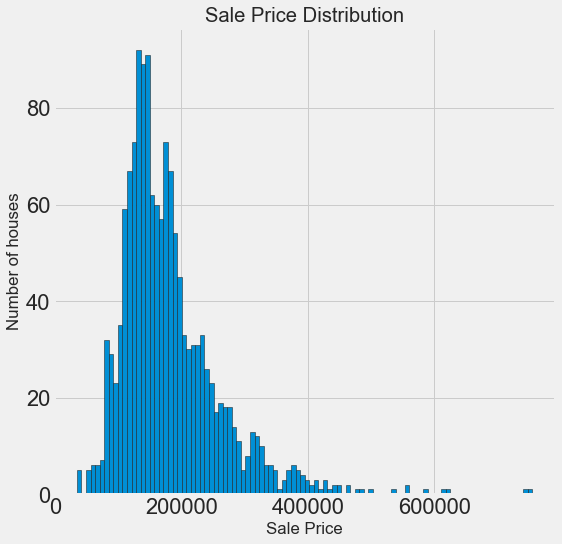

In [13]:
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.hist(data['SalePrice'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Sale Price'); plt.ylabel('Number of houses')
plt.title('Sale Price Distribution')

In [14]:
# from the figure, we see outliers at the right end
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
data['SalePrice'].dropna().sort_values().tail(15)

527     446261.0
591     451950.0
1243    465000.0
1373    466500.0
185     475000.0
798     485000.0
178     501837.0
769     538000.0
440     555000.0
1046    556581.0
803     582933.0
898     611657.0
1169    625000.0
1182    745000.0
691     755000.0
Name: SalePrice, dtype: float64

In [16]:
data.loc[data['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,...,1.0,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3.0,832.0,TA,TA,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000.0
1182,1183,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,...,0.0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3.0,813.0,TA,TA,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000.0


#### Removing Outliers
The definition of an extreme outlier:

On the low end, an extreme outlier is below First Quartile−3∗Interquartile Range

On the high end, an extreme outlier is above Third Quartile+3∗Interquartile Range

After checking the relation between SalePrice and OverallQual (in the next section) as well as with GrLivArea, I decide to keep outliers in SalePrice but remove two over the upper boundary outliers in GrLivArea. 

In [17]:
# calculate the first and third quartile
first_quartile = data['SalePrice'].describe()['25%']
third_quartile = data['SalePrice'].describe()['75%']
Interquartile = third_quartile - first_quartile

upper_outlier = data.loc[data['SalePrice'] > third_quartile + 3 * Interquartile].index
lower_outlier = data.loc[data['SalePrice'] < first_quartile - 3 * Interquartile].index
len(list(upper_outlier) + list(lower_outlier))

12

In [18]:
# calculate the first and third quartile
first_quartile = data['GrLivArea'].describe()['25%']
third_quartile = data['GrLivArea'].describe()['75%']
Interquartile = third_quartile - first_quartile

upper_outlier = data.loc[data['GrLivArea'] > third_quartile + 3 * Interquartile].index
lower_outlier = data.loc[data['GrLivArea'] < first_quartile - 3 * Interquartile].index
len(list(upper_outlier) + list(lower_outlier))

9

In [19]:
data['GrLivArea'].dropna().sort_values().tail(15)

769     3279
1168    3390
635     3395
1268    3447
304     3493
1222    3500
185     3608
1169    3627
1362    3672
728     3820
691     4316
1182    4476
523     4676
1089    5095
1298    5642
Name: GrLivArea, dtype: int64

In [20]:
# Remove the two outliers
data.loc[data['GrLivArea'] > 4500, ['GrLivArea', 'SalePrice']]

,GrLivArea,SalePrice
523,4676,184750.0
1298,5642,160000.0
1089,5095,NaN


In [21]:
data = data.loc[(data['GrLivArea'] < 4500) | (data['SalePrice'].isna())]

#### Looking for Relationships

In [22]:
Zones = data.dropna(subset=['SalePrice'])
Zones = Zones['MSZoning'].value_counts()
Zones = Zones[Zones>50].index

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


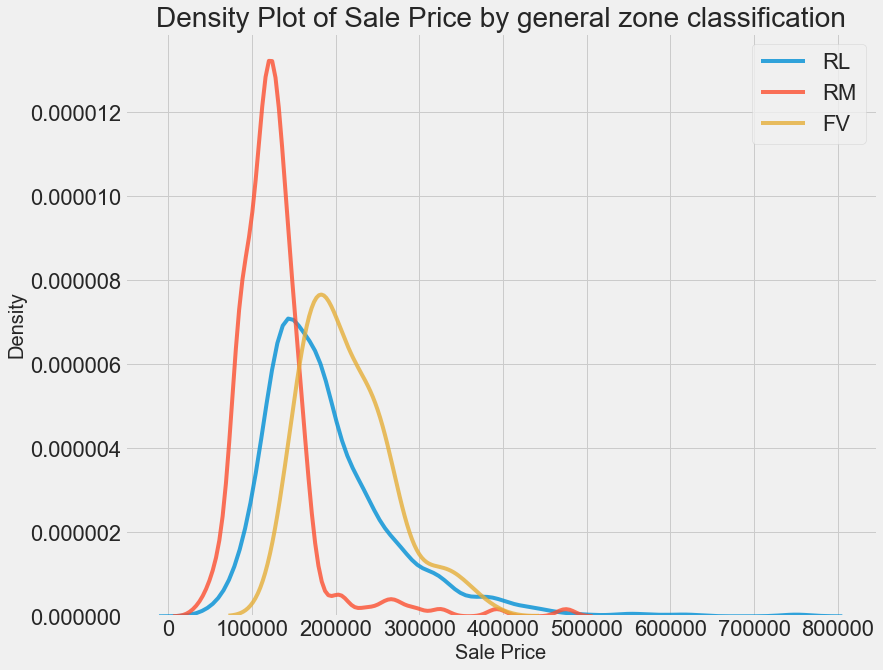

In [23]:
'''
Plot of distribution of Sale Price for zone class 
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
'''
figsize(12, 10)

# Plot each building
for zone in Zones:
    # Select the zone type
    subset = data[data['MSZoning'] == zone]
    
    # Density plot of Sale Price
    sns.kdeplot(subset['SalePrice'].dropna(),
               label = zone, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Sale Price', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Sale Price by general zone classification', size = 28);

In [24]:
Nbos = data.dropna(subset=['SalePrice'])
Nbos = Nbos['Neighborhood'].value_counts()
Nbos = Nbos[Nbos>50].index

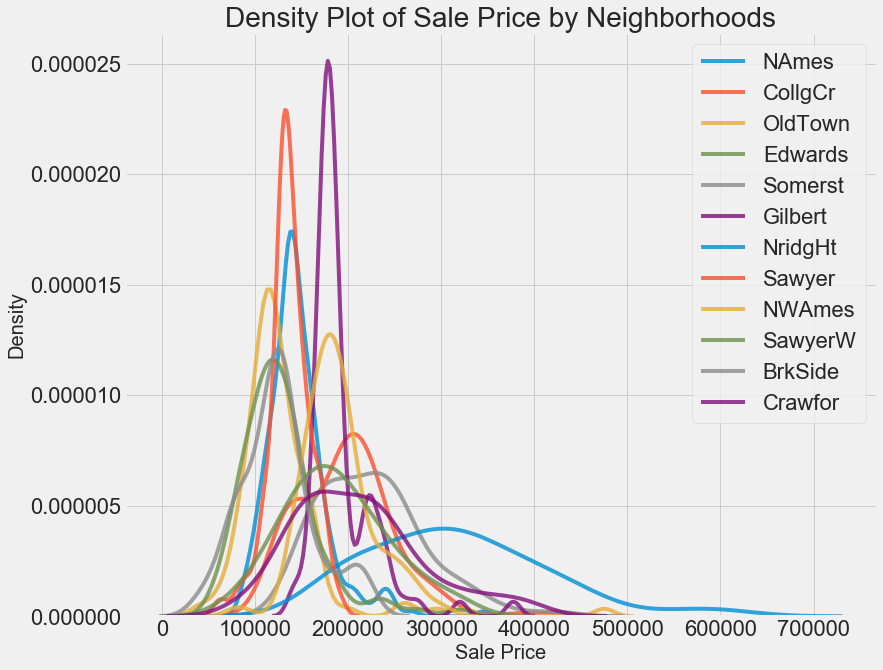

In [25]:
# Plot of distribution of Sale Price for neighborhoods
figsize(12, 10)

for Nbo in Nbos:    
    subset = data[data['Neighborhood'] == Nbo]
    
    # Density plot of Sale Price
    sns.kdeplot(subset['SalePrice'].dropna(),
               label = Nbo, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Sale Price', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Sale Price by Neighborhoods', size = 28);

#### Correlations between Features and Target

In [26]:
# Find all correlations and sort 
correlations_data = data.corr()['SalePrice'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

KitchenAbvGr    -0.135946
EnclosedPorch   -0.128646
OverallCond     -0.077948
YrSold          -0.028882
LowQualFinSF    -0.025625
Id              -0.021673
MiscVal         -0.021203
BsmtHalfBath    -0.016881
BsmtFinSF2      -0.011422
3SsnPorch        0.044568
MoSold           0.046124
PoolArea         0.099490
ScreenPorch      0.111415
BedroomAbvGr     0.168245
BsmtUnfSF        0.214460
Name: SalePrice, dtype: float64 

BsmtFinSF1      0.409384
Fireplaces      0.469862
MasVnrArea      0.482719
GarageYrBlt     0.487156
YearRemodAdd    0.507717
YearBuilt       0.523608
TotRmsAbvGrd    0.537769
FullBath        0.562165
GarageArea      0.629217
1stFlrSF        0.631530
GarageCars      0.641047
TotalBsmtSF     0.651153
GrLivArea       0.734968
OverallQual     0.795774
SalePrice       1.000000
Name: SalePrice, dtype: float64


##### select all numerical variables

In [27]:
# Select the numeric columns
num_features = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in num_features.columns:
    # Skip the target column
    if col == 'SalePrice':
        next
    else:
        num_features['sqrt_' + col] = np.sqrt(num_features[col])
        num_features['log_' + col] = np.log(num_features[col])

# Drop houses without sale price
num_features = num_features.dropna(subset = ['SalePrice'])

# Find correlations with the sale price 
correlations = num_features.corr()['SalePrice'].dropna().sort_values()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [28]:
# Display most negative correlations
correlations.head(15)

log_PoolArea         -0.162549
sqrt_EnclosedPorch   -0.160151
log_KitchenAbvGr     -0.139835
KitchenAbvGr         -0.135946
sqrt_KitchenAbvGr    -0.128766
EnclosedPorch        -0.128646
log_HalfBath         -0.084674
OverallCond          -0.077948
sqrt_OverallCond     -0.064118
sqrt_MiscVal         -0.046718
log_OverallCond      -0.045367
sqrt_LowQualFinSF    -0.036725
sqrt_BsmtFinSF2      -0.034527
YrSold               -0.028882
sqrt_YrSold          -0.028882
Name: SalePrice, dtype: float64

In [29]:
correlations.tail(15)

log_TotalBsmtSF     0.596855
log_1stFlrSF        0.598499
log_2ndFlrSF        0.601014
sqrt_1stFlrSF       0.618131
GarageArea          0.629217
1stFlrSF            0.631530
GarageCars          0.641047
TotalBsmtSF         0.651153
log_GrLivArea       0.702898
sqrt_GrLivArea      0.723152
GrLivArea           0.734968
log_OverallQual     0.735662
sqrt_OverallQual    0.771584
OverallQual         0.795774
SalePrice           1.000000
Name: SalePrice, dtype: float64

##### select categorical features, which has good correlations with the predictant

In [30]:
# Select the categorical columns
categorical_subset = data.select_dtypes('object')

# One hot encode
cat_features = pd.get_dummies(categorical_subset)

cat_features['SalePrice'] = data['SalePrice']

# Find correlations with the sale price 
cat_features = cat_features.dropna(subset=['SalePrice'])
correlations = cat_features.corr()['SalePrice'].dropna().sort_values()

In [31]:
correlations.head(10)

ExterQual_TA        -0.589909
KitchenQual_TA      -0.519821
BsmtQual_TA         -0.452785
GarageFinish_Unf    -0.410942
MasVnrType_None     -0.375028
GarageType_Detchd   -0.354326
Foundation_CBlock   -0.343582
HeatingQC_TA        -0.312869
MSZoning_RM         -0.288169
LotShape_Reg        -0.268191
Name: SalePrice, dtype: float64

In [32]:
correlations.tail(20)

Exterior2nd_VinylSd      0.306400
BsmtExposure_Gd          0.309881
KitchenQual_Gd           0.321676
Neighborhood_NoRidge     0.330413
MasVnrType_Stone         0.333348
GarageType_Attchd        0.336406
FireplaceQu_Gd           0.340250
SaleCondition_Partial    0.355162
SaleType_New             0.360731
MSSubClass_60            0.378507
Neighborhood_NridgHt     0.402139
GarageFinish_Fin         0.420860
HeatingQC_Ex             0.434989
BsmtFinType1_GLQ         0.435586
ExterQual_Gd             0.452529
ExterQual_Ex             0.460578
Foundation_PConc         0.498341
KitchenQual_Ex           0.509425
BsmtQual_Ex              0.557860
SalePrice                1.000000
Name: SalePrice, dtype: float64

In [33]:
'''
a rule of thumb for correlation
0.00-0.19: very weak
0.20-0.39: weak
0.40-0.59: moderate 
0.60-0.79: strong
0.80-1.00: very strong
here I choose cutoff values ca. > 0.3 or < -0.3
'''
cat_features = list(list(correlations.head(10).index)+list(correlations.tail(20).index))
cat_features_names = list()
for feature in cat_features:
    cat_features_names.append(feature.split('_')[0])
    
cat_features_names = set(cat_features_names)
cat_features_names 

{'BsmtExposure',
 'BsmtFinType1',
 'BsmtQual',
 'ExterQual',
 'Exterior2nd',
 'FireplaceQu',
 'Foundation',
 'GarageFinish',
 'GarageType',
 'HeatingQC',
 'KitchenQual',
 'LotShape',
 'MSSubClass',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'SaleCondition',
 'SalePrice',
 'SaleType'}

In [34]:
cat_features = data[cat_features_names]
cat_features = cat_features.dropna(subset=['SalePrice'])
cat_features = cat_features.drop(columns=['SalePrice'])
cat_features_names.remove('SalePrice')
features = pd.concat([cat_features, num_features],axis=1)
features.columns

Index(['BsmtExposure', 'MSSubClass', 'BsmtFinType1', 'HeatingQC', 'MSZoning',
       'MasVnrType', 'SaleCondition', 'Exterior2nd', 'GarageType',
       'KitchenQual',
       ...
       'sqrt_ScreenPorch', 'log_ScreenPorch', 'sqrt_PoolArea', 'log_PoolArea',
       'sqrt_MiscVal', 'log_MiscVal', 'sqrt_MoSold', 'log_MoSold',
       'sqrt_YrSold', 'log_YrSold'],
      dtype='object', length=127)

#### Two-Variable Plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


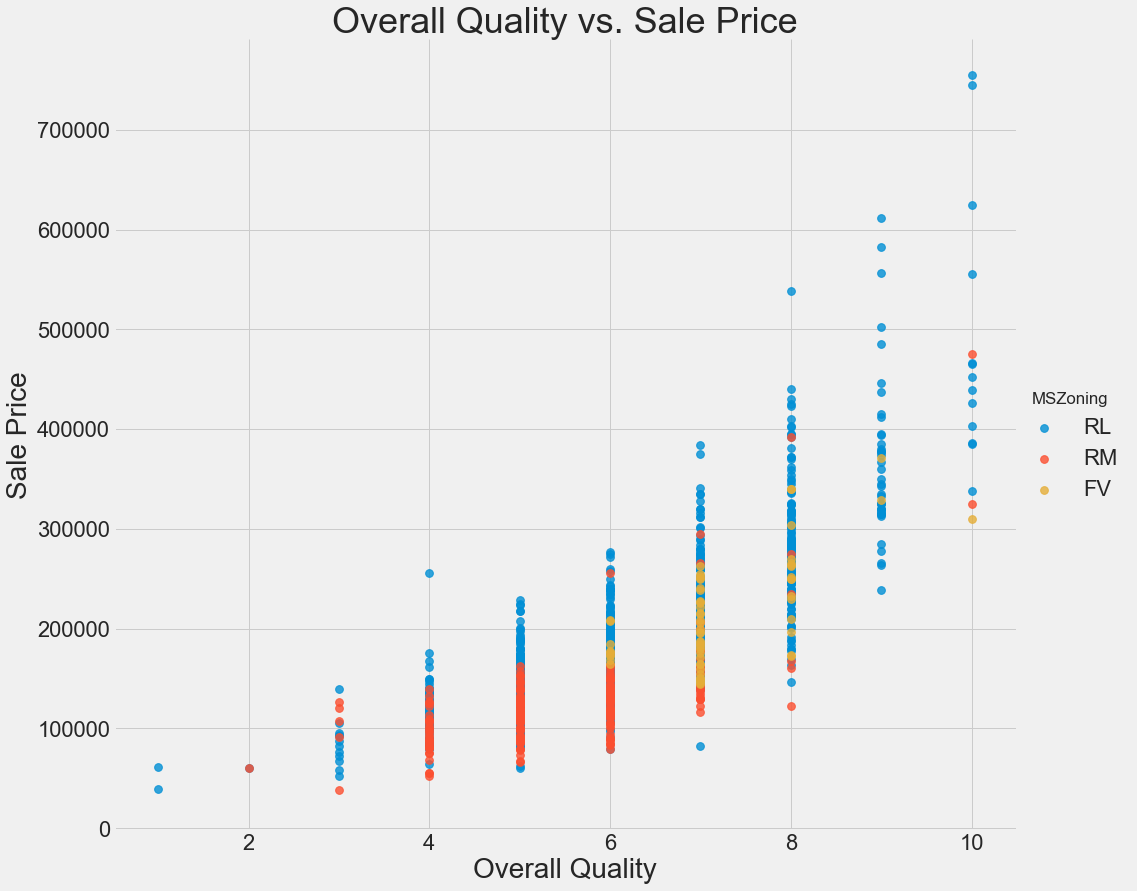

In [35]:
figsize(12, 10)

# Limit to zone types with more than 50 observations (from previous code)
features = features[features['MSZoning'].isin(Zones)]

# Use seaborn to plot a scatterplot of Sale Price vs. Overall Quality
sns.lmplot('OverallQual', 'SalePrice', 
          hue = 'MSZoning', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Overall Quality", size = 28)
plt.ylabel('Sale Price', size = 28)
plt.title('Overall Quality vs. Sale Price', size = 36);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


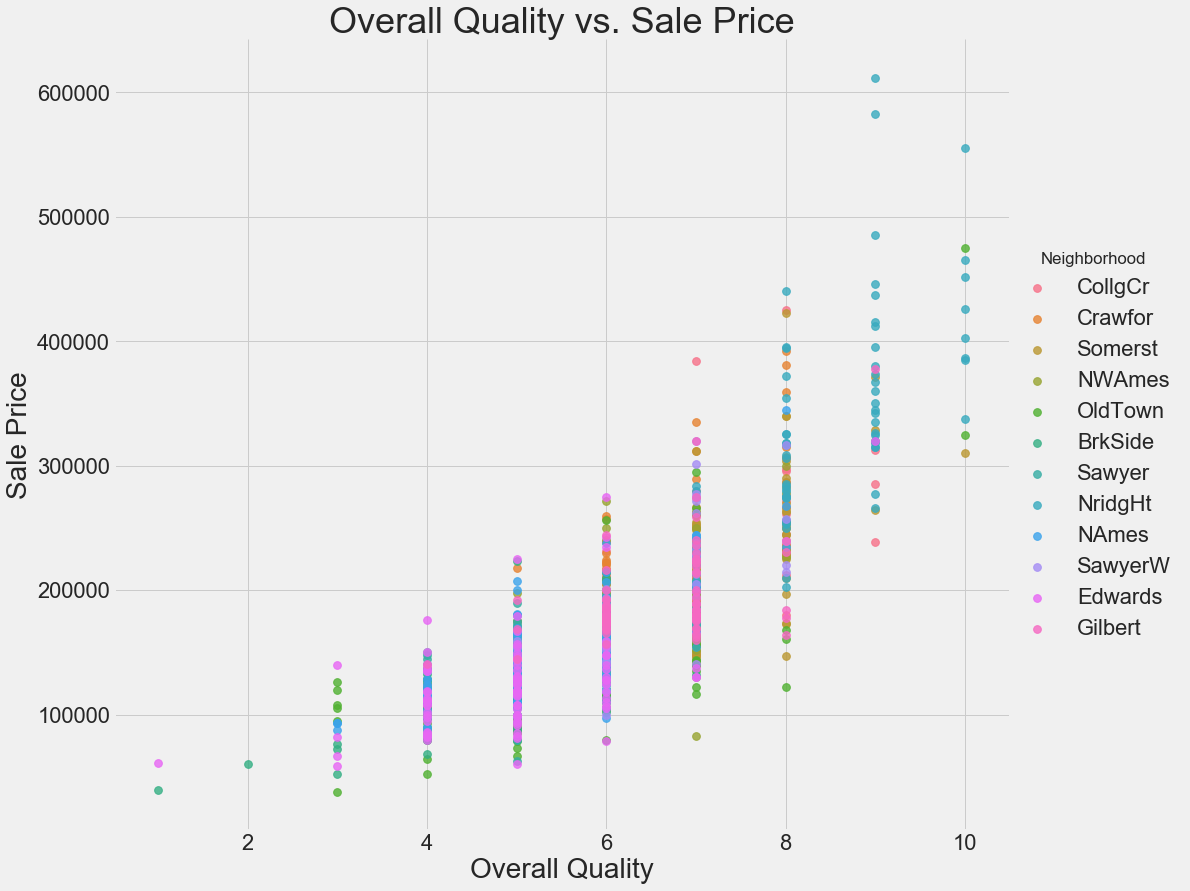

In [36]:
figsize(12, 10)
# Limit to neighborhood with more than 50 observations (from previous code)
features = features[features['Neighborhood'].isin(Nbos)]

# Use seaborn to plot a scatterplot of sale price vs overall quality
sns.lmplot('OverallQual', 'SalePrice', 
          hue = 'Neighborhood', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Overall Quality", size = 28)
plt.ylabel('Sale Price', size = 28)
plt.title('Overall Quality vs. Sale Price', size = 36);

#### Pairs Plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


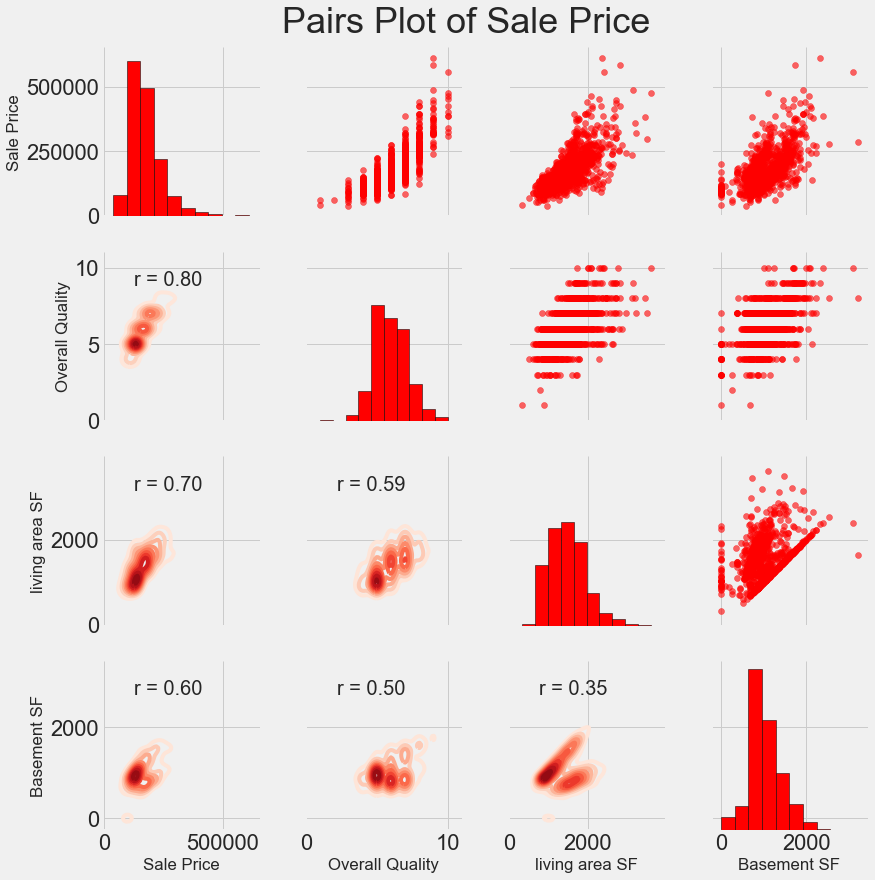

In [37]:
# Extract the columns to  plot
plot_data = features[['SalePrice', 'OverallQual', 
                      'GrLivArea', 
                      'TotalBsmtSF']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'SalePrice': 'Sale Price', 
                                        'OverallQual': 'Overall Quality',
                                        'GrLivArea': 'living area SF',
                                        'TotalBsmtSF':'Basement SF'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Sale Price', size = 36, y = 1.02);

# Feature Engineering and Selection

- Feature Engineering: to extract or create new features from the raw data. This might mean taking transformations of variables, such as the log and square root, or one-hot encoding categorical variables. 
- Feature Selection: to choose the most relevant features. It might be something as simple as the highest correlation with the target, or the features with the most variance. 

In this project, I will
- Select all the numerical variables and categorical variables which significantly correlated with the predictant
- Add in the log transformation of the numerical variables, One-hot encode the categorical variables

For feature selection, I will:
- Remove collinear features

In [38]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Sale Price column
    if col == 'SalePrice':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col]+0.0001)
        
# Select the categorical columns
categorical_subset = data[cat_features_names]

# fill missing category data before one hot encoding
categorical_subset = categorical_subset.fillna(categorical_subset.mode().iloc[0])

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


(2917, 205)

### Remove Collinear Features

In [39]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Sale Price
    y = x['SalePrice']
    x = x.drop(columns = ['SalePrice'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    
    # Add the target back in to the data
    x['SalePrice'] = y
               
    return x

In [40]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


In [41]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(2917, 145)

In [42]:
no_price = features[features['SalePrice'].isna()]
price = features[features['SalePrice'].notnull()]

print(no_price.shape)
print(price.shape)

(1459, 145)
(1458, 145)


In [43]:
# Separate out the features and targets
features = price.drop(columns='SalePrice')
targets = pd.DataFrame(price['SalePrice'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 80% training and 20% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(1166, 144)
(292, 144)
(1166, 1)
(292, 1)


# Establish a Baseline

In [44]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [45]:
baseline_guess = np.median(y)

print('The baseline guess of median price %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 162250.00
Baseline Performance on the test set: MAE = 57100.2192


# Save the prepared datasets

In [46]:
# Save the no prices, training, and testing data
no_price.to_csv('data/no_price.csv', index = False)
X.to_csv('data/training_features.csv', index = False)
X_test.to_csv('data/testing_features.csv', index = False)
y.to_csv('data/training_labels.csv', index = False)
y_test.to_csv('data/testing_labels.csv', index = False)